<a href="https://colab.research.google.com/github/Saadman53/Thesis-Human-Activity-Recognition/blob/Defense/(ECFS%20changed)Human_Action_Recognition_using_Sensor_Data(ACC%2BGYRO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')
gdrive_path = "drive/My Drive/Dataset/Final Dataset/sensor_data_acc_gyro.csv"

Mounted at /content/drive


In [1]:
!pip install minepy
!pip install sklearn_relief
!pip install sklearn-genetic
!pip install info_gain
!pip install ax-platform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 KB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp38-cp38-linux_x86_64.whl size=232645 sha256=abd144a7eeca3e2d7f1684202ed336095bc4a0b0892e9ac76b3214f0d502a75c
  Stored in directory: /root/.cache/pip/wheels/38/c1/43/6122536c873081a61af51f929214171d5372f93a29e263a06f
Successfully built minepy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 14.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from minepy import MINE
from sklearn.feature_selection import mutual_info_regression
import scipy
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from scipy.special import entr
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import differential_entropy
from scipy.stats import entropy
import scipy.io as sio

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor
import torch.optim as optim
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render
from ax.utils.tutorials.cnn_utils import train, evaluate


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import mutual_info_regression
from info_gain import info_gain

import random
from sklearn.metrics import confusion_matrix, recall_score, precision_score


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


from torch.utils.data import DataLoader, ConcatDataset
# from torchvision import transforms
from sklearn.model_selection  import StratifiedKFold
%matplotlib inline

In [7]:
df = pd.read_csv(gdrive_path)
df.tail()

,0_mean_a_x,0_var_a_x,0_std_a_x,0_max_a_x,0_min_a_x,0_range_a_x,0_dc_comp_a_x,0_spec_energy_a_x,0_spec_entropy_a_x,0_max_psd_a_x,...,9_spec_entropy_g_m,9_max_psd_g_m,9_min_psd_g_m,9_min_max_psd_g_m,9_max_xas_g_m,9_min_xas_g_m,9_min_max_xas_g_m,activity,mat_filename,filename
1160,-0.262760,0.049628,0.222775,0.035156,-0.696045,0.731201,371936.218386,6.434845e+07,2.152059,0.580166,...,2.992244,0.391365,9.763734e-11,2.494789e-10,0.625592,0.000010,0.000016,22,zyh_a22_t5.mat,zyh_a22_t5
1161,-0.293368,0.052936,0.230078,0.220947,-0.800293,1.021240,408638.128240,8.107497e+07,2.126449,0.511186,...,2.588938,0.483618,3.130640e-10,6.473369e-10,0.695427,0.000018,0.000025,22,zyh_a22_t6.mat,zyh_a22_t6
1162,-0.328229,0.057713,0.240234,0.035400,-0.851074,0.886474,599021.977566,1.584268e+08,2.114252,0.503679,...,3.116362,0.411375,1.965916e-10,4.778891e-10,0.641385,0.000014,0.000022,22,zyh_a22_t7.mat,zyh_a22_t7
1163,-0.324693,0.050767,0.225314,-0.005859,-0.778320,0.772461,641629.966089,1.718775e+08,2.205948,0.365290,...,3.488557,0.303883,1.035890e-10,3.408849e-10,0.551255,0.000010,0.000018,22,zyh_a22_t8.mat,zyh_a22_t8
1164,-0.283808,0.045411,0.213100,0.023193,-0.713867,0.737060,433162.917818,8.446987e+07,2.234118,0.549912,...,3.184521,0.400774,5.540869e-11,1.382544e-10,0.633067,0.000007,0.000012,22,zyh_a22_t9.mat,zyh_a22_t9


In [8]:
df.shape

(1165, 1203)

In [9]:
df['mat_filename'] = [x.replace(" ","") for x in df['mat_filename'] ]

In [10]:
df.drop(['filename'], axis = 1, inplace = True)

In [11]:
df.drop(df.columns[df.isna().any()].tolist(), axis = 1, inplace = True)
# df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
df.shape

(1165, 1156)

In [13]:
df = df.drop(983, inplace = False)
X = df.drop(['activity'], axis = 1)
y = df['activity']-1
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.15, random_state=42, stratify = y_train)

train_files = X_train['mat_filename'].values
test_files = X_test['mat_filename'].values
validation_files = X_val['mat_filename'].values
X_train.drop(['mat_filename'], axis = 1,inplace = True)
X_test.drop(['mat_filename'], axis = 1,inplace = True)
X_val.drop(['mat_filename'], axis = 1,inplace = True)



In [14]:
print(X_train.shape, X_val.shape, X_test.shape)

(742, 1154) (131, 1154) (291, 1154)


In [15]:
features = X_train.columns

In [16]:
#relief f
from sklearn.metrics.pairwise import pairwise_distances
def reliefF(X, y, **kwargs):
    """
    This function implements the reliefF feature selection
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    kwargs: {dictionary}
        parameters of reliefF:
        k: {int}
            choices for the number of neighbors (default k = 5)
    Output
    ------
    score: {numpy array}, shape (n_features,)
        reliefF score for each feature
    Reference
    ---------
    Robnik-Sikonja, Marko et al. "Theoretical and empirical analysis of relieff and rrelieff." Machine Learning 2003.
    Zhao, Zheng et al. "On Similarity Preserving Feature Selection." TKDE 2013.
    """

    if "k" not in kwargs.keys():
        k = 5
    else:
        k = kwargs["k"]
    n_samples, n_features = X.shape

    # calculate pairwise distances between instances
    distance = pairwise_distances(X, metric='manhattan')

    score = np.zeros(n_features)

    # the number of sampled instances is equal to the number of total instances
    for idx in range(n_samples):
        near_hit = []
        near_miss = dict()

        self_fea = X[idx, :]
        c = np.unique(y).tolist()

        stop_dict = dict()
        for label in c:
            stop_dict[label] = 0
        del c[c.index(y[idx])]

        p_dict = dict()
        p_label_idx = float(len(y[y == y[idx]]))/float(n_samples)

        for label in c:
            p_label_c = float(len(y[y == label]))/float(n_samples)
            p_dict[label] = p_label_c/(1-p_label_idx)
            near_miss[label] = []

        distance_sort = []
        distance[idx, idx] = np.max(distance[idx, :])

        for i in range(n_samples):
            distance_sort.append([distance[idx, i], int(i), y[i]])
        distance_sort.sort(key=lambda x: x[0])

        for i in range(n_samples):
            # find k nearest hit points
            if distance_sort[i][2] == y[idx]:
                if len(near_hit) < k:
                    near_hit.append(distance_sort[i][1])
                elif len(near_hit) == k:
                    stop_dict[y[idx]] = 1
            else:
                # find k nearest miss points for each label
                if len(near_miss[distance_sort[i][2]]) < k:
                    near_miss[distance_sort[i][2]].append(distance_sort[i][1])
                else:
                    if len(near_miss[distance_sort[i][2]]) == k:
                        stop_dict[distance_sort[i][2]] = 1
            stop = True
            for (key, value) in stop_dict.items():
                    if value != 1:
                        stop = False
            if stop:
                break

        # update reliefF score
        near_hit_term = np.zeros(n_features)
        for ele in near_hit:
            near_hit_term = np.array(abs(self_fea-X[ele, :]))+np.array(near_hit_term)

        near_miss_term = dict()
        for (label, miss_list) in near_miss.items():
            near_miss_term[label] = np.zeros(n_features)
            for ele in miss_list:
                near_miss_term[label] = np.array(abs(self_fea-X[ele, :]))+np.array(near_miss_term[label])
            score += near_miss_term[label]/(k*p_dict[label])
        score -= near_hit_term/k
    return score


def feature_ranking(score):
    """
    Rank features in descending order according to reliefF score, the higher the reliefF score, the more important the
    feature is
    """
    idx = np.argsort(score, 0)
    return idx[::-1]
def selected_features(X, score):
  ranked_features = feature_ranking(score)
  sel_feat = []
  for i in range(X.shape[1]):
    if(ranked_features[i]>0):
      sel_feat.append(ranked_features[i])
    else:
      break
  return X.columns[np.array(sel_feat)]


In [17]:
##symmetrical uncertainty
def SU(df, X,Y):
  if(Y=='activity'):
    IG = mutual_info_classif(np.transpose(np.array([df[X]])), df[Y]).item()
    H_Y = entropy(df[Y])
  else:
    IG = mutual_info_regression(np.transpose(np.array([df[X]])), df[Y]).item()
    H_Y = differential_entropy(df[Y])
  H_X = differential_entropy(df[X])
  su = ((2.0*IG)/(H_X+H_Y))
  return su
 
def MI(df, X,Y):
  if(Y=='activity'):
    MI = mutual_info_classif(np.transpose(np.array([df[X]])), df[Y]).item()
  else:
    MI = mutual_info_regression(np.transpose(np.array([df[X]])), df[Y]).item()
  return MI

def MIC_feature_selection(X_train, y_train):
  scores = {}
  mine = MINE(alpha=0.6, c=15, est="mic_approx")
  for i in range(X_train.shape[1]):
    mic_score = mine.compute_score(X_train.iloc[:,i], y_train).mic()
    scores.append(mic_score)
    res = pd.Series(np.array(scores),index = features).sort_values(ascending=False)
  return res
# res[res>0.60].index.values

def SU_feature_selection(X_train, y_train):
  df_train = df[X_train.columns].loc[X_train.index].copy()
  scores = []
  #print("SU:\nCol\tScore")
  for col in df_train.columns:
    if col!='activity':
      #print(col+":")
      score = SU(df, col, 'activity')
      scores.append(score)
      #print(score)
  ser = pd.Series(np.array(scores),index = features).sort_values(ascending=False)
  return ser[ser>0.0].index.values

#Fast Correlation Based Filter
def FCBF(df, features, C):
  thresh = 0.000001
  N = len(features)
  S_list = {}
  for i in range(N):
    val = SU(df, features[i], C)
    if(val> thresh):
      S_list[features[i]] = val
  S_list = pd.Series(S_list).sort_values(ascending=False)
  no_features = S_list.shape[0]
  a_list = np.ones(no_features)
  for i in range(no_features):
    if(a_list[i]==1):
      Fp = S_list.index[i]
      for j in range(i+1,no_features):
        if(a_list[j]==1):
          Fq = S_list.index[j]
          if(SU(df, Fp,Fq) >= S_list[j]):
            #print(f"{j} has been eleminated while in {i}")
            a_list[j]=0
  idx = np.where(a_list==1)[0]
  return S_list.index[idx]

def random_forest_feature_selection(X_train, y_train):
  sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
  sel.fit(X_train, y_train)
  sel.get_support()
  selected_features_rf= X_train.columns[(sel.get_support())].values
  return selected_features_rf

def reliefF_feature_selection(X_train, y_train):
  score = reliefF(X_train.to_numpy(),y_train.to_numpy())
  selected_features_relief = selected_features(X_train,score).values
  return selected_features_relief

def genetic_feature_selection(X_train, y_train):
  estimator = DecisionTreeClassifier()
  model = GeneticSelectionCV(
      estimator, cv=5, verbose=0,
      scoring="accuracy", max_features=100,
      n_population=100, crossover_proba=0.5,
      mutation_proba=0.2, n_generations=50,
      crossover_independent_proba=0.5,
      mutation_independent_proba=0.04,
      tournament_size=3, n_gen_no_change=10,
      caching=True, n_jobs=-1)
  model = model.fit(X_train,y_train)
  selected_features_genetic = X_train.columns[model._get_support_mask()].values
  return selected_features_genetic

def mutual_information_feature_selection(X_train, y_train):
  mi_scores = mutual_info_regression(X_train, y_train, discrete_features=False)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  selected_features_info_gain = mi_scores[mi_scores>0.5].index.values
  return selected_features_info_gain

def information_gain_feature_selection(X_train, y_train):
  scores = []
  for i in range(X_train.shape[1]):
    score = info_gain.info_gain(X_train.iloc[:,i], y_train )
    scores.append(score)
    #print(X_train.columns[i],score) [res>0.60].index.values
  res = pd.Series(np.array(scores),index = features).sort_values(ascending=False)
  return res[res>3.0].index.values
def gain_ratio_feature_selection(X_train, y_train):
  gain_ratio = []
  #print("Gain Ratio:\nCol\tScore")
  for i in range(X_train.shape[1]):
    score = info_gain.info_gain_ratio(X_train.iloc[:,i], y_train )
    gain_ratio.append(score)
    #print(X_train.columns[i],score)
  res = pd.Series(np.array(gain_ratio),index = features).sort_values(ascending=False)
  return res[res>0.60].index.values

def chi2_feature_selection(X_train,y_train):
  scaler = MinMaxScaler()
  X_train1 = scaler.fit_transform(X_train)
  from sklearn.feature_selection import chi2
  chi_scores = chi2(X_train1,y_train)
  p_values = pd.Series(chi_scores[1],index = X_train.columns)
  p_values.sort_values(ascending = False , inplace = True)
  selected_features_chi = p_values[p_values>0.5].index.values
  return selected_features_chi

In [40]:
def ECFS(df,X_train,y_train):
  selected_feature_list = [gain_ratio_feature_selection(X_train, y_train),
                           reliefF_feature_selection(X_train,y_train), 
                           information_gain_feature_selection(X_train, y_train), 
                           mutual_information_feature_selection(X_train,y_train), 
                           chi2_feature_selection(X_train,y_train)]
  start_time = time.time()
  s = set()
  df_train = df.loc[X_train.index]
  for i in range(5):
    for j in range(len(selected_feature_list[i])):
      s.add(selected_feature_list[i][j])
  final_list = []
  ensemble_list = []
  for feat in s:
    cnt = 0
    for j in range(5):
      if(feat in selected_feature_list[j]):
        cnt+=1
    if(cnt==5):
      print("OK")
      final_list.append(feat)
    else:
      ensemble_list.append(feat)
  sel = FCBF(df_train, ensemble_list, 'activity')
  final_list.extend(sel.values.tolist())
  end_time = time.time()
  return final_list, end_time-start_time

In [41]:
selected_feat_ecfs, run_time = ECFS(df, X_train, y_train)
print(f"Selected {len(selected_feat_ecfs)} features and ensemble time is {run_time}")

OK
OK
OK
OK
OK
OK
Selected 417 features and ensemble time is 768.2240498065948


In [42]:
sensor_features = {'train_filename':train_files, 'test_filename': test_files, 'validation_files':validation_files, 'X_train': X_train[selected_feat_ecfs].to_numpy(), 'X_test': X_test[selected_feat_ecfs].to_numpy(), 'X_val': X_val[selected_feat_ecfs].to_numpy()}
sio.savemat("drive/My Drive/Dataset/Final Dataset/sensor_features_acc_gyro_experimental.mat",sensor_features)

In [65]:
def EFS_MI(df, X_train, y_train):
  selected_feature_list = [gain_ratio_feature_selection(X_train, y_train),
                           reliefF_feature_selection(X_train,y_train), 
                           SU_feature_selection(X_train, y_train), 
                           information_gain_feature_selection(X_train, y_train), 
                           chi2_feature_selection(X_train,y_train)]
  start_time = time.time()
  s = set()
  df_train = df.loc[X_train.index]
  for i in range(5):
    for j in range(len(selected_feature_list[i])):
      s.add(selected_feature_list[i][j])
  optimal_list = []
  ensemble_list = []
  for feat in s:
    cnt = 0
    for j in range(5):
      if(feat in selected_feature_list[j]):
        cnt+=1
    if(cnt==5):
      print("OK")
      optimal_list.append(feat)
    else:
      ensemble_list.append(feat)
  f_class_mi = []
  for feature in ensemble_list:
    score = MI(df_train, feature, 'activity')
    f_class_mi.append(score)
  f_class_mi = pd.Series(np.array(f_class_mi),index = ensemble_list).sort_values(ascending=False)
  ensemble_list= f_class_mi.index.values
  #print(len(optimal_list))
  #print(len(ensemble_list))
  for feature in ensemble_list:
    scores = []
    for opt_feature in optimal_list:
      scores.append(MI(df_train,feature,opt_feature))
    if (max(scores)<0.75):
      optimal_list.append(feature)
  end_time = time.time()
  return optimal_list, end_time-start_time


In [44]:
class DNN(nn.Module):
    def __init__(self,input_size,output_size):
        super(DNN,self).__init__()
        self.hidden1 = nn.Linear(input_size,128)
        self.hidden2 = nn.Linear(128,64)
        self.hidden3 = nn.Linear(64,32)
        self.output = nn.Linear(32,output_size)
        self.softmax = F.softmax
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(32)
    
    def forward(self,x):
        out = self.hidden1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        
        out = self.hidden2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.hidden3(out)
        out = self.batchnorm3(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.output(out)
        return out

In [45]:
def train_test_loader(X_train, X_test, y_train, y_test, selected_features):
  scaler = StandardScaler()
  train_X = X_train[selected_features].copy()
  test_X = X_test[selected_features].copy()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)
  train_dataset = TensorDataset(Tensor(train_X), Tensor(y_train.values))
  test_dataset = TensorDataset(Tensor(test_X), Tensor(y_test.values))
  test_loader = DataLoader(test_dataset, batch_size= 64)
  return train_dataset, test_loader

train_set, test_loader = train_test_loader(X_train, X_test, y_train, y_test, selected_feat_ecfs)

In [46]:
def net_train(net, train_loader, parameters):
  criterion = nn.CrossEntropyLoss(reduction = "sum")
  optimizer = optim.SGD(net.parameters(), # or any optimizer you prefer 
                        lr=parameters.get("lr", 0.001), # 0.001 is used if no lr is specified
                        momentum=parameters.get("momentum", 0.9)
  )

  scheduler = optim.lr_scheduler.StepLR(
      optimizer,
      step_size=int(parameters.get("step_size", 30)),
      gamma=1.0,  # default is no learning rate decay
  )

  num_epochs = parameters.get("max_epoch", 3) # Play around with epoch number
  # Train Network
  for _ in range(num_epochs):
    for inputs, labels in train_loader:
      # zero the parameter gradients
      optimizer.zero_grad()
      # forward + backward + optimize
      outputs = net(inputs)
      loss = criterion(outputs, labels.long())
      loss.backward()
      optimizer.step()
      scheduler.step()
  return net

In [47]:
def train_evaluate(parameterization):
    # constructing a new training data loader allows us to tune the batch size
    train_loader = torch.utils.data.DataLoader(train_set,
                                batch_size=parameterization.get("batchsize", 32),
                                shuffle=True,
                                num_workers=0,
                                pin_memory=True,drop_last=True)
    
    # Get neural net
    untrained_net = DNN(inpsize,outsize)
    # train
    trained_net = net_train(net=untrained_net, train_loader=train_loader, 
                            parameters=parameterization)
    # return the accuracy of the model as it was trained in this run
    return evaluate(
        net=trained_net,
        data_loader=test_loader,
        dtype = torch.float,
        device = "cpu"
    )

In [56]:
train_set, test_loader = train_test_loader(X_train, X_val, y_train, y_val, selected_feat_ecfs)
inpsize = len(selected_feat_ecfs)
outsize = np.unique(y_train).shape[0]
dtype = torch.float
best_parameters, values, experiment, model = optimize(
    parameters=[
        {"name": "lr", "type": "range", "bounds": [1e-6, 0.2], "log_scale": True},
        {"name": "batchsize", "type": "range", "bounds": [16, 128]},
        {"name": "momentum", "type": "range", "bounds": [0.0, 1.0]},    
        {"name": "max_epoch", "type": "range", "bounds": [10, 100]},
        {"name": "stepsize", "type": "range", "bounds": [20, 40]},     
    ],
  
    evaluation_function=train_evaluate,
    objective_name='accuracy',
)

print(best_parameters)
means, covariances = values
print(means)
print(covariances)

[INFO 02-07 17:28:10] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter lr. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-07 17:28:10] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter batchsize. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-07 17:28:10] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter momentum. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-07 17:28:10] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter max_epoch. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter di

{'lr': 0.012797556722230858, 'batchsize': 115, 'momentum': 0.0, 'max_epoch': 90, 'stepsize': 24}
{'accuracy': 1.000028109695294}
{'accuracy': {'accuracy': 0.0013051869190937276}}


In [57]:
best_parameters

{'lr': 0.012797556722230858,
 'batchsize': 115,
 'momentum': 0.0,
 'max_epoch': 90,
 'stepsize': 24}

In [58]:
best_objectives = np.array([[trial.objective_mean*100 for trial in experiment.trials.values()]])

best_objective_plot = optimization_trace_single_method(
    y=np.maximum.accumulate(best_objectives, axis=1),
    title="Model performance vs. # of iterations",
    ylabel="Classification Accuracy, %",
)
render(best_objective_plot)

render(plot_contour(model=model, param_x='batchsize', param_y='lr', metric_name='accuracy'))

In [59]:
data = experiment.fetch_data()
dff = data.df
best_arm_name = dff.arm_name[dff['mean'] == dff['mean'].max()].values[0]
best_arm = experiment.arms_by_name[best_arm_name]
best_arm

Arm(name='6_0', parameters={'lr': 0.004132501424974872, 'batchsize': 112, 'momentum': 0.7567894831299782, 'max_epoch': 69, 'stepsize': 22})

In [60]:
def optim_scheduler(net,parameters):
  optimizer = optim.SGD(net.parameters(), # or any optimizer you prefer 
                        lr=parameters.get("lr", 0.001), # 0.001 is used if no lr is specified
                        momentum=parameters.get("momentum", 0.9)
  )
  scheduler = optim.lr_scheduler.StepLR(
      optimizer,
      step_size=int(parameters.get("step_size", 30)),
      gamma=1.0,  # default is no learning rate decay
  )
  return optimizer, scheduler
def extract_batch(X,y,batch_size,step,no_of_samples):
  l = (step-1)*batch_size
  return X[l:(l+batch_size)],y[l:min(no_of_samples,l+batch_size)]

def model_training_evaluation(X_train, X_test, y_train, y_test, selected_feat):
  train_X = X_train[selected_feat]
  test_X = X_test[selected_feat]
  scaler = MinMaxScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)
  train_X = torch.from_numpy(train_X.astype(np.float32))
  test_X = torch.from_numpy(test_X.astype(np.float32))
  train_y =  torch.tensor(y_train.values.astype(np.float32))
  test_y =  torch.tensor(y_test.values.astype(np.float32))
  input_size = train_X.shape[1]
  output_size = torch.unique(train_y).shape[0]
  learning_rate = best_parameters['lr']
  num_epochs = best_parameters['max_epoch']
  n_samples = train_X.shape[0]
  criterion = nn.CrossEntropyLoss(reduction='sum')
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  net = DNN(input_size, output_size)
  optimizer, scheduler = optim_scheduler(net,best_parameters)
  figure, ax = plt.subplots(5,figsize=(10,10))
  figure.tight_layout(pad=5.0)
  cnt = 1
  best_loss = 100000
  best_model = None
  best_epoch = None
  for train_index, val_index in skf.split(X_train, y_train):
    train_X_fold = train_X[train_index]
    train_y_fold = train_y[train_index]
    val_x_fold = train_X[val_index]
    val_y_fold = train_y[val_index]
    n_samples = train_X_fold.shape[0]
    batch_size = best_parameters['batchsize']
    train_loss = []
    val_loss = []
    print(f"Training for fold {cnt}")
    for epoch in range(num_epochs):
      step = 1
      while(batch_size*step<=n_samples):
        x,y =  extract_batch(train_X_fold,train_y_fold, batch_size, step, n_samples)
        # Forward Propagation
        y_predicted = net(x)
        loss = criterion(y_predicted,  torch.tensor(y, dtype=torch.long))
        # Backward propagation and update
        loss.backward()
        optimizer.step()
        scheduler.step()
        # Performing zero grad before new step
        optimizer.zero_grad()
        step = step+1
      t_loss = criterion( net(train_X_fold),  torch.tensor(train_y_fold, dtype=torch.long)).item()/train_X_fold.shape[0]
      v_loss = criterion( net(val_x_fold),  torch.tensor(val_y_fold, dtype=torch.long)).item()/val_x_fold.shape[0]
      train_loss.append(t_loss) 
      val_loss.append(v_loss)
      if(v_loss<best_loss):
        best_loss = v_loss
        best_model = net
        best_epoch = epoch
      print(epoch*100/num_epochs)
    m = "Fold "+str(cnt)
    ax[cnt-1].title.set_text(m)
    ax[cnt-1].set_ylabel("Total Loss")
    ax[cnt-1].set_xlabel("No of Epochs")
    ax[cnt-1].plot(range(num_epochs),train_loss, label = "train loss")
    ax[cnt-1].plot(range(num_epochs),val_loss, label = "validation loss")
    cnt+=1
  y_pred = best_model(test_X)
  return best_model, y_pred


Training for fold 1
0.0
1.1111111111111112
2.2222222222222223
3.3333333333333335
4.444444444444445
5.555555555555555
6.666666666666667
7.777777777777778
8.88888888888889
10.0
11.11111111111111
12.222222222222221
13.333333333333334
14.444444444444445
15.555555555555555
16.666666666666668
17.77777777777778
18.88888888888889
20.0
21.11111111111111
22.22222222222222
23.333333333333332
24.444444444444443
25.555555555555557
26.666666666666668
27.77777777777778
28.88888888888889
30.0
31.11111111111111
32.22222222222222
33.333333333333336
34.44444444444444
35.55555555555556
36.666666666666664
37.77777777777778
38.888888888888886
40.0
41.111111111111114
42.22222222222222
43.333333333333336
44.44444444444444
45.55555555555556
46.666666666666664
47.77777777777778
48.888888888888886
50.0
51.111111111111114
52.22222222222222
53.333333333333336
54.44444444444444
55.55555555555556
56.666666666666664
57.77777777777778
58.888888888888886
60.0
61.111111111111114
62.22222222222222
63.333333333333336
64.4

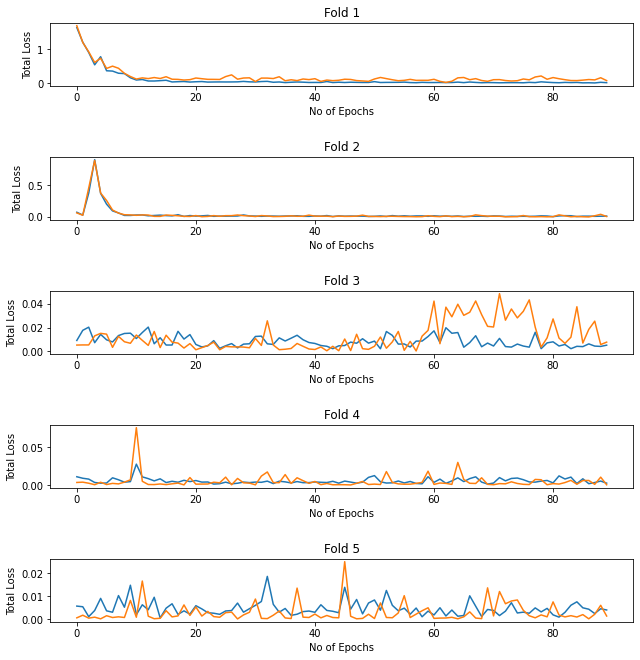

In [61]:
start = time.time()
best_model, y_pred = model_training_evaluation(X_train, X_test, y_train, y_test, selected_feat_ecfs)
end = time.time()
training_time = end - start

In [62]:
print(f"Time took to train {training_time} seconds")

Time took to train 9.444393634796143 seconds


In [63]:
def cf_matrix(y_pred, test_y):
  y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
  _, y_pred = torch.max(y_pred_softmax, dim = 1)
  y_pred = y_pred.detach().numpy().ravel()
  correct_pred = (y_pred == test_y).astype(np.float)
  acc = correct_pred.sum()*100.0 / y_pred.shape[0]
  cm = confusion_matrix(test_y.ravel(), y_pred)
  recall = np.mean(recall_score(test_y.ravel(), y_pred, average=None))*100.0
  precision = np.mean(precision_score(test_y.ravel(), y_pred, average=None))*100.0
  f1 = 2*((precision*recall*1.0)/(precision+recall))
  f,ax=plt.subplots(figsize=(20,10))
  sns.heatmap(cm,annot=True,fmt='.0f', cmap="Blues")
  print(f"Accuracy: {acc:.2f}%")
  print(f"Precision: {precision:.2f}%")
  print(f"Recall: {recall:.2f}%")
  print(f"F1 score: {f1:.2f}%")
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  return cm,acc, recall, precision, f1


Accuracy: 98.63%
Precision: 98.70%
Recall: 98.65%
F1 score: 98.67%


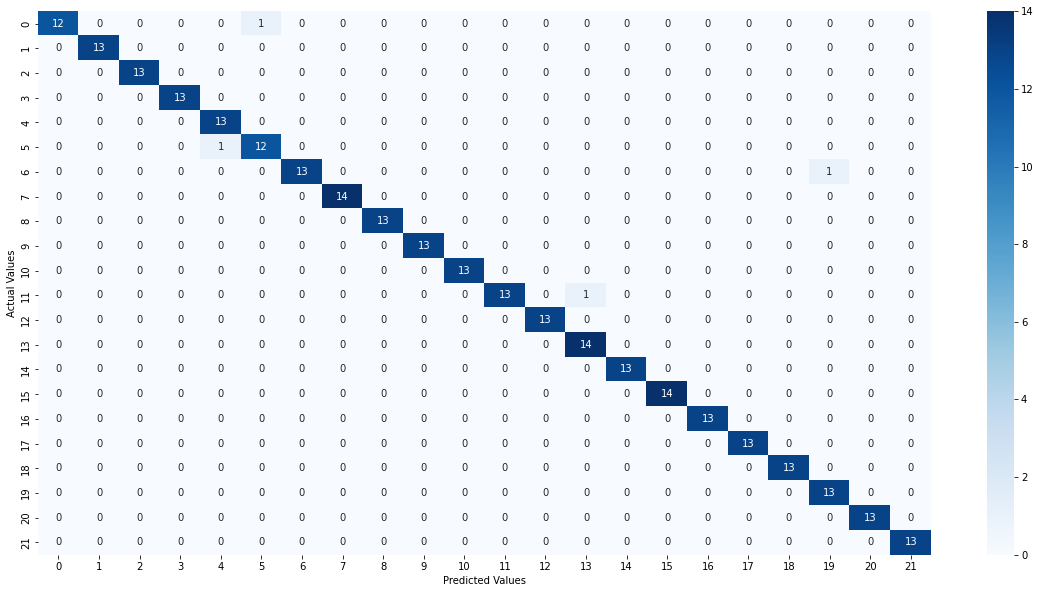

In [64]:
cm,acc, recall, precision,f1 = cf_matrix(y_pred, y_test)

In [66]:
pred_dict = {"preds":y_pred.detach().numpy(), 'y_test':y_test.ravel()}
sio.savemat("drive/My Drive/Dataset/Final Dataset/Predictions/sensor_predictions_acc_gyro_ecfs_experimental.mat", pred_dict)

In [67]:
from datetime import datetime

In [68]:
ts = str((datetime.now()).timestamp())
model_save_name = 'acc_gyro_dnn_ecfs_experimental_'+ts+'_.pt'
path = F"drive/My Drive/Dataset/Final Dataset/Models/ECFS/{model_save_name}" 
torch.save(best_model.state_dict(), path)

In [69]:
selected_feat_efs_mi = EFS_MI(df, X_train, y_train)


OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
Selected 2 features and ensemble time is 768.2240498065948


In [91]:
print(f"Selected {len(selected_feat_efs_mi)} features")

Selected 353 features


In [79]:
print(f"Selected {len(selected_feat_efs_mi[0])} features and ensemble time is {selected_feat_efs_mi[1]}")

1403.482979774475

In [80]:
selected_feat_efs_mi = selected_feat_efs_mi[0]

In [81]:
train_set, test_loader = train_test_loader(X_train, X_val, y_train, y_val, selected_feat_efs_mi)
inpsize = len(selected_feat_efs_mi)

outsize = np.unique(y_train).shape[0]
dtype = torch.float
best_parameters, values, experiment, model = optimize(
    parameters=[
        {"name": "lr", "type": "range", "bounds": [1e-3, 0.1], "log_scale": True},
        {"name": "batchsize", "type": "range", "bounds": [16, 128]},
        {"name": "momentum", "type": "range", "bounds": [0.0, 1.0]},    
        {"name": "max_epoch", "type": "range", "bounds": [50, 100]},
        {"name": "stepsize", "type": "range", "bounds": [20, 40]},     
    ],
  
    evaluation_function=train_evaluate,
    objective_name='accuracy',
)


print(best_parameters)
means, covariances = values
print(means)
print(covariances)

[INFO 02-07 18:03:48] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter lr. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-07 18:03:48] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter batchsize. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-07 18:03:48] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter momentum. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-07 18:03:48] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter max_epoch. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter di

{'lr': 0.0030942760250718643, 'batchsize': 44, 'momentum': 0.6537593753459906, 'max_epoch': 94, 'stepsize': 31}
{'accuracy': 0.986545702079557}
{'accuracy': {'accuracy': 1.972927712012237e-05}}


In [83]:
best_parameters

{'lr': 0.0030942760250718643,
 'batchsize': 44,
 'momentum': 0.6537593753459906,
 'max_epoch': 94,
 'stepsize': 31}

In [84]:
best_objectives = np.array([[trial.objective_mean*100 for trial in experiment.trials.values()]])

best_objective_plot = optimization_trace_single_method(
    y=np.maximum.accumulate(best_objectives, axis=1),
    title="Model performance vs. # of iterations",
    ylabel="Classification Accuracy, %",
)
render(best_objective_plot)

render(plot_contour(model=model, param_x='batchsize', param_y='lr', metric_name='accuracy'))

Training for fold 1
0.0
1.0638297872340425
2.127659574468085
3.1914893617021276
4.25531914893617
5.319148936170213
6.382978723404255
7.446808510638298
8.51063829787234
9.574468085106384
10.638297872340425
11.702127659574469
12.76595744680851
13.829787234042554
14.893617021276595
15.957446808510639
17.02127659574468
18.085106382978722
19.148936170212767
20.21276595744681
21.27659574468085
22.340425531914892
23.404255319148938
24.46808510638298
25.53191489361702
26.595744680851062
27.659574468085108
28.72340425531915
29.78723404255319
30.851063829787233
31.914893617021278
32.97872340425532
34.04255319148936
35.1063829787234
36.170212765957444
37.234042553191486
38.297872340425535
39.361702127659576
40.42553191489362
41.48936170212766
42.5531914893617
43.61702127659574
44.680851063829785
45.744680851063826
46.808510638297875
47.87234042553192
48.93617021276596
50.0
51.06382978723404
52.12765957446808
53.191489361702125
54.255319148936174
55.319148936170215
56.38297872340426
57.44680851063

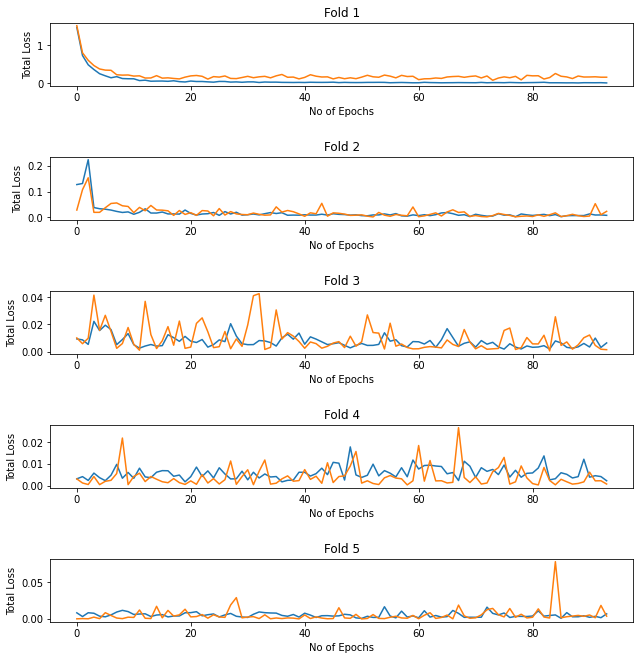

In [85]:
start = time.time()
best_model, y_pred = model_training_evaluation(X_train, X_test, y_train, y_test, selected_feat_efs_mi)
end = time.time()
training_time = end - start

In [86]:
print(f"Time took to train {training_time} seconds")

Time took to train 15.54884147644043 seconds


Accuracy: 97.25%
Precision: 97.48%
Recall: 97.23%
F1 score: 97.35%


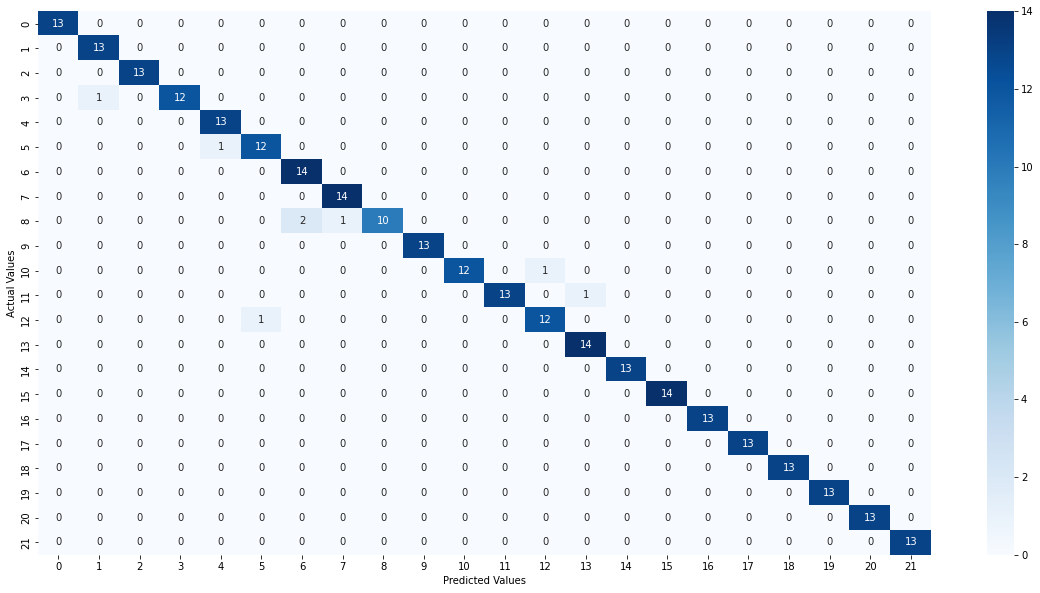

In [87]:
cm,acc, recall, precision,f1 = cf_matrix(y_pred, y_test)

In [88]:
pred_dict = {"preds":y_pred.detach().numpy(), 'y_test':y_test.ravel()}
sio.savemat("drive/My Drive/Dataset/Final Dataset/Predictions/sensor_predictions_acc_gyro_efsmi_experimental.mat", pred_dict)

In [89]:
ts = str((datetime.now()).timestamp())
model_save_name = 'acc_gyro_dnn_efsmi_experimental_'+ts+'_.pt'
path = F"drive/My Drive/Dataset/Final Dataset/Models/EFS-MI/{model_save_name}" 
torch.save(best_model.state_dict(), path)

In [90]:
feature_dict = {"ecfs": np.array(selected_feat_ecfs), 'efs-mi': np.array(selected_feat_efs_mi)}
sio.savemat("drive/My Drive/Dataset/Final Dataset/feature_list_ecfs_efsmi_experimental.mat", feature_dict)